In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [39]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="bwr", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [40]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [41]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [42]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [ ]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [3]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=4, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


# EDA

In [4]:
ast = pd.read_csv('../data/preprecessed_data/asian_ast.csv')
ast = ast.drop('Unnamed: 0', axis=1)
ast

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,Temperature change with respect to a baseline ...,Degree Celsius,1.624,0.991,0.587,1.475,2.154
1,"Armenia, Rep. of",ARM,Temperature change with respect to a baseline ...,Degree Celsius,2.739,1.864,1.954,2.183,1.845
2,"Azerbaijan, Rep. of",AZE,Temperature change with respect to a baseline ...,Degree Celsius,2.131,1.878,1.889,1.958,2.029
3,"Bahrain, Kingdom of",BHR,Temperature change with respect to a baseline ...,Degree Celsius,2.280,2.127,1.989,2.421,1.971
4,Bangladesh,BGD,Temperature change with respect to a baseline ...,Degree Celsius,0.911,1.151,0.934,1.326,1.240
5,Bhutan,BTN,Temperature change with respect to a baseline ...,Degree Celsius,1.221,1.136,1.035,1.648,1.456
6,Brunei Darussalam,BRN,Temperature change with respect to a baseline ...,Degree Celsius,0.903,1.221,1.222,0.972,1.048
7,Cambodia,KHM,Temperature change with respect to a baseline ...,Degree Celsius,0.655,1.370,1.275,0.786,0.886
8,"China, P.R.: Hong Kong",HKG,Temperature change with respect to a baseline ...,Degree Celsius,1.218,1.783,1.835,1.964,1.369
9,"China, P.R.: Macao",MAC,Temperature change with respect to a baseline ...,Degree Celsius,1.218,1.783,1.835,1.964,1.369


In [81]:
ast['Indicator'].value_counts()

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    50
Name: count, dtype: int64

Bộ dữ liệu này chỉ có 1 chỉ số duy nhất là sự thay đổi nhiệt độ trung bình của bề mặt so với chuẩn trong khoảng năm 1951-1980

In [38]:
ast.describe()

,2018,2019,2020,2021,2022
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.450220,1.458520,1.477040,1.594660,1.519460
std,0.651552,0.365878,0.483116,0.535073,0.530729
min,0.333000,0.443000,0.059000,0.428000,0.559000
25%,0.908750,1.221500,1.276500,1.142750,1.190750
50%,1.231500,1.495000,1.500500,1.643500,1.391000
75%,2.112250,1.764750,1.819250,1.964000,1.862500
max,2.739000,2.127000,2.800000,2.661000,2.665000


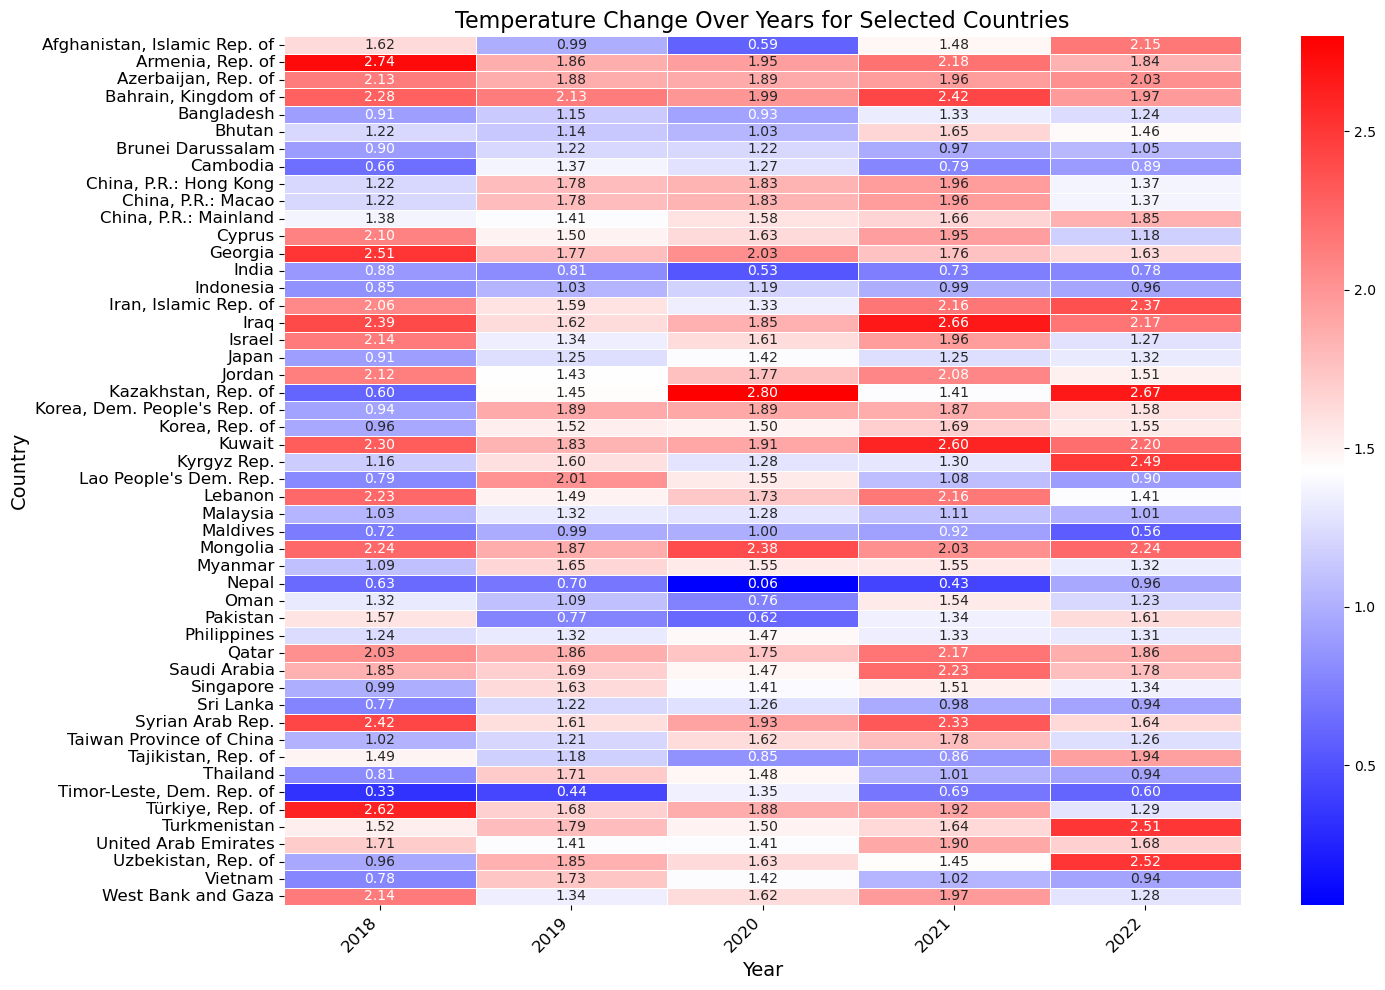

In [9]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_heatmap(ast, title)

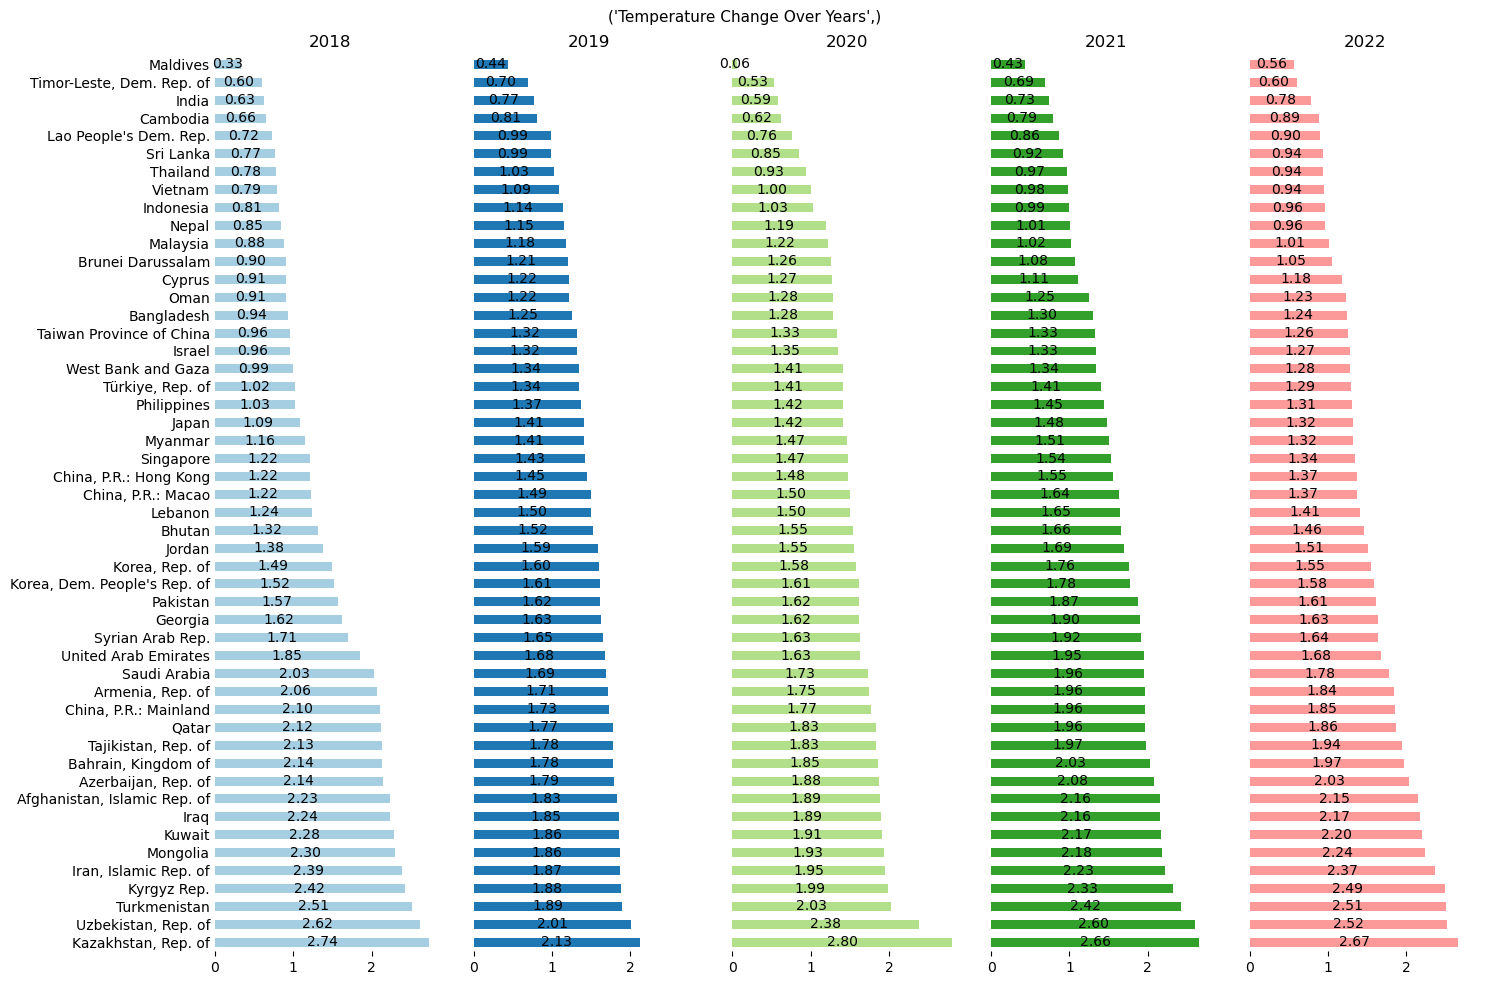

In [10]:
title="Temperature Change Over Years",
visualize_change_panel_bar_plot(ast, title)

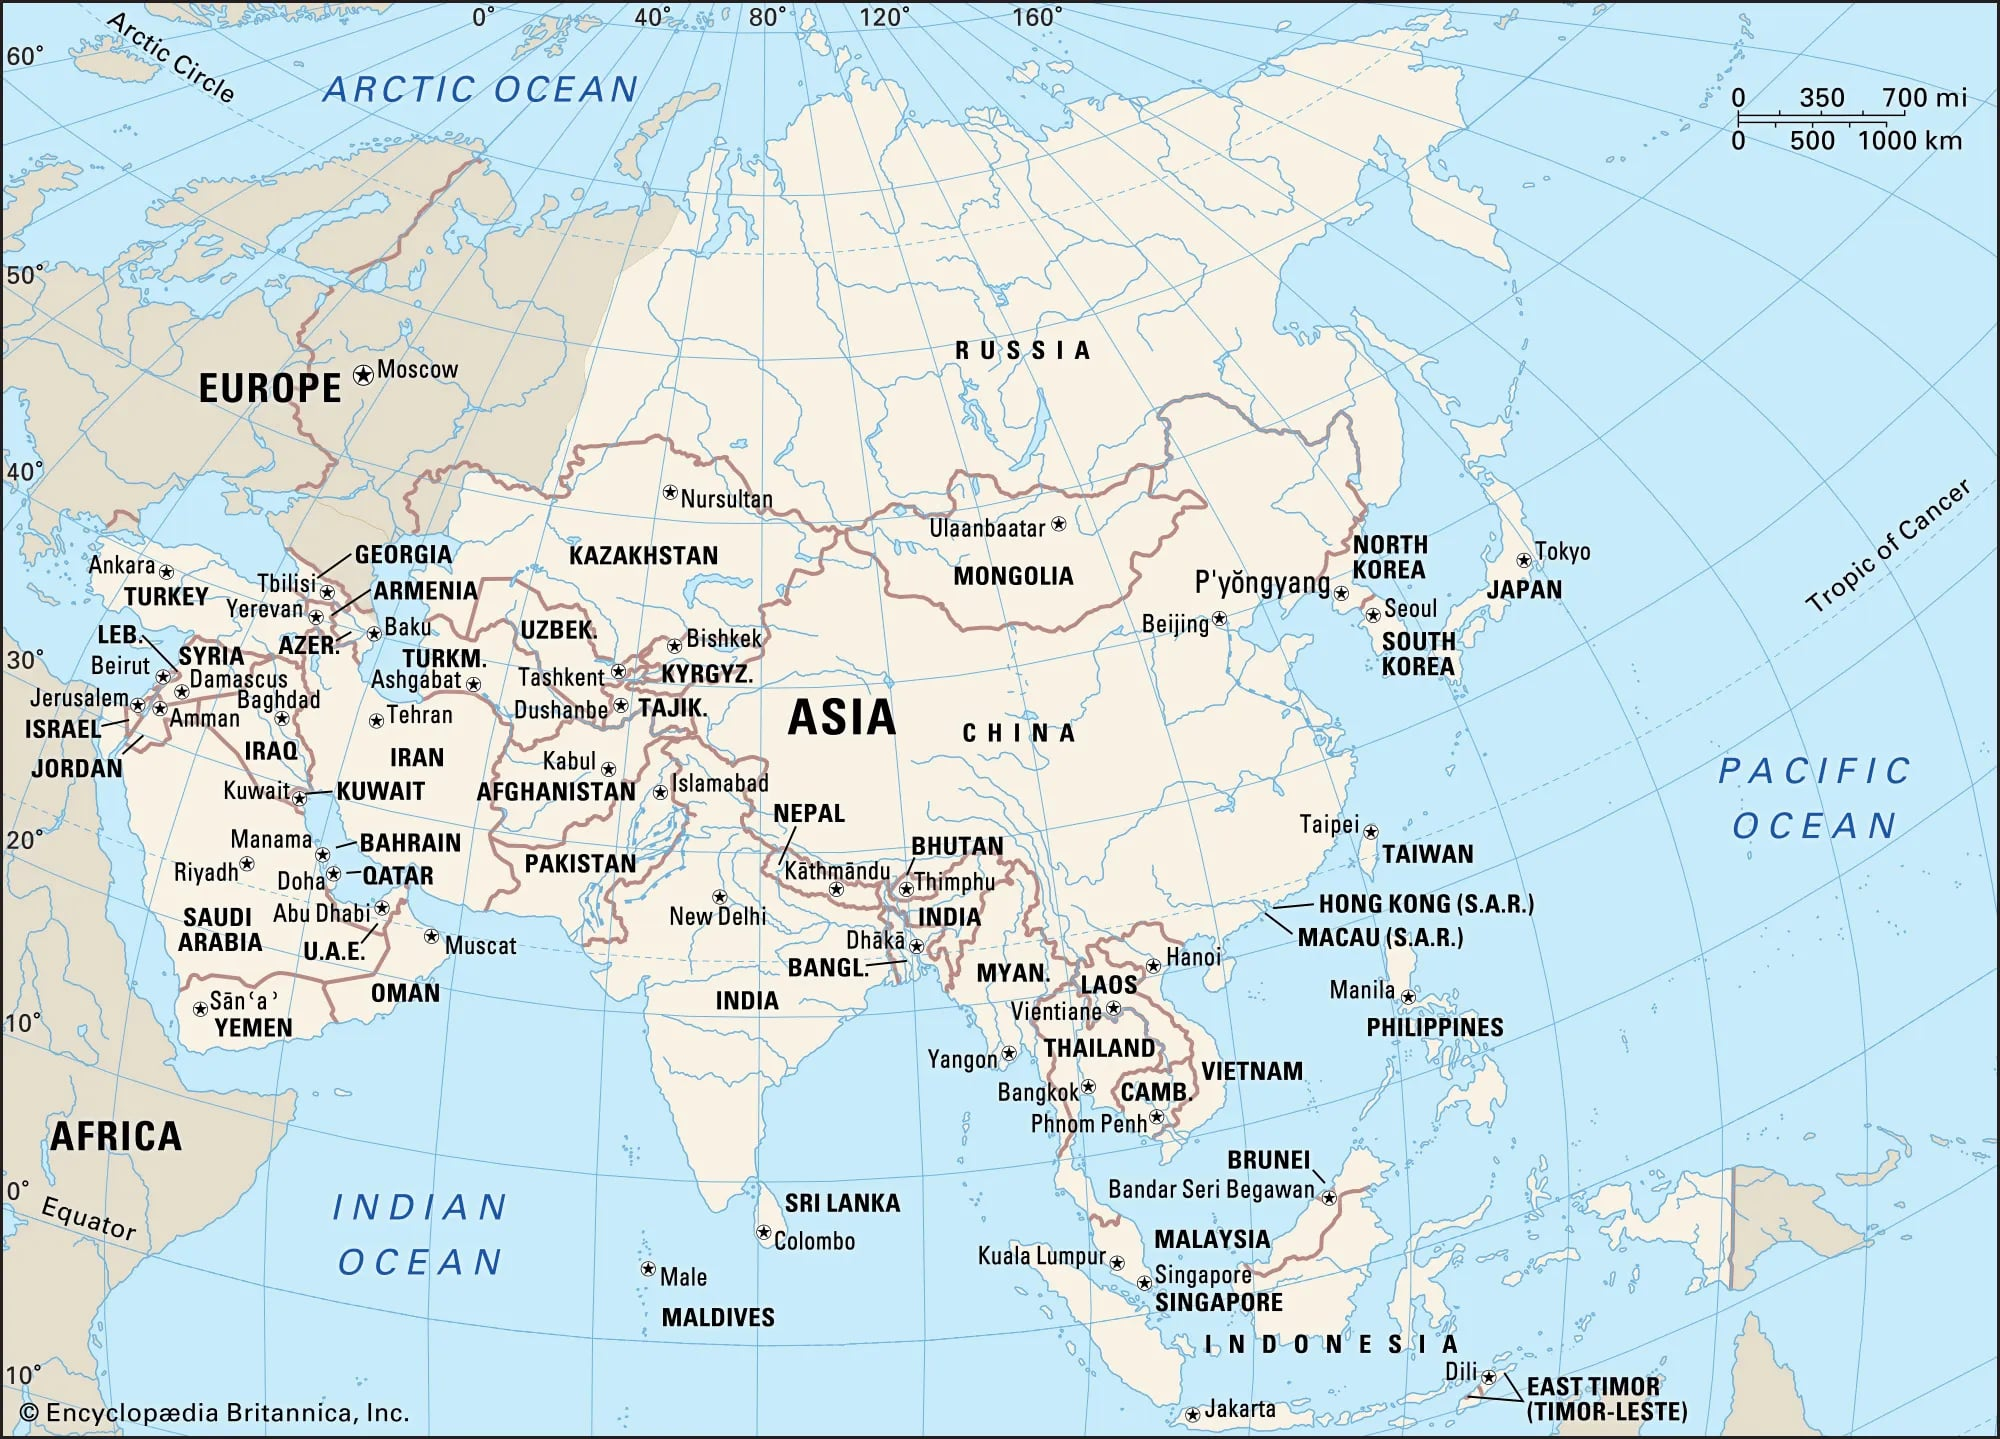

In [11]:
from IPython import display
display.Image('asiamap.jpg')

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [12]:
top_k_countries_by_year(ast, k=3)

Top 3 countries for 2018:
Country: Armenia, Rep. of, Value: 2.739
Country: Türkiye, Rep. of, Value: 2.617
Country: Georgia, Value: 2.514
----------------------------------------
Top 3 countries for 2019:
Country: Bahrain, Kingdom of, Value: 2.127
Country: Lao People's Dem. Rep., Value: 2.014
Country: Korea, Dem. People's Rep. of, Value: 1.889
----------------------------------------
Top 3 countries for 2020:
Country: Kazakhstan, Rep. of, Value: 2.800
Country: Mongolia, Value: 2.384
Country: Georgia, Value: 2.031
----------------------------------------
Top 3 countries for 2021:
Country: Iraq, Value: 2.661
Country: Kuwait, Value: 2.605
Country: Bahrain, Kingdom of, Value: 2.421
----------------------------------------
Top 3 countries for 2022:
Country: Kazakhstan, Rep. of, Value: 2.665
Country: Uzbekistan, Rep. of, Value: 2.520
Country: Turkmenistan, Value: 2.508
----------------------------------------


In [60]:
bottom_k_countries_by_year(ast, k=3)

Bottom 3 countries for 2018:
Country: Timor-Leste, Dem. Rep. of, Value: 0.333
Country: Kazakhstan, Rep. of, Value: 0.605
Country: Nepal, Value: 0.630
----------------------------------------
Bottom 3 countries for 2019:
Country: Timor-Leste, Dem. Rep. of, Value: 0.443
Country: Nepal, Value: 0.699
Country: Pakistan, Value: 0.774
----------------------------------------
Bottom 3 countries for 2020:
Country: Nepal, Value: 0.059
Country: India, Value: 0.529
Country: Afghanistan, Islamic Rep. of, Value: 0.587
----------------------------------------
Bottom 3 countries for 2021:
Country: Nepal, Value: 0.428
Country: Timor-Leste, Dem. Rep. of, Value: 0.693
Country: India, Value: 0.734
----------------------------------------
Bottom 3 countries for 2022:
Country: Maldives, Value: 0.559
Country: Timor-Leste, Dem. Rep. of, Value: 0.601
Country: India, Value: 0.784
----------------------------------------


In [1]:
visualize_top_bottom_k_line_plot(ast, 5)

NameError: name 'visualize_top_bottom_k_line_plot' is not defined

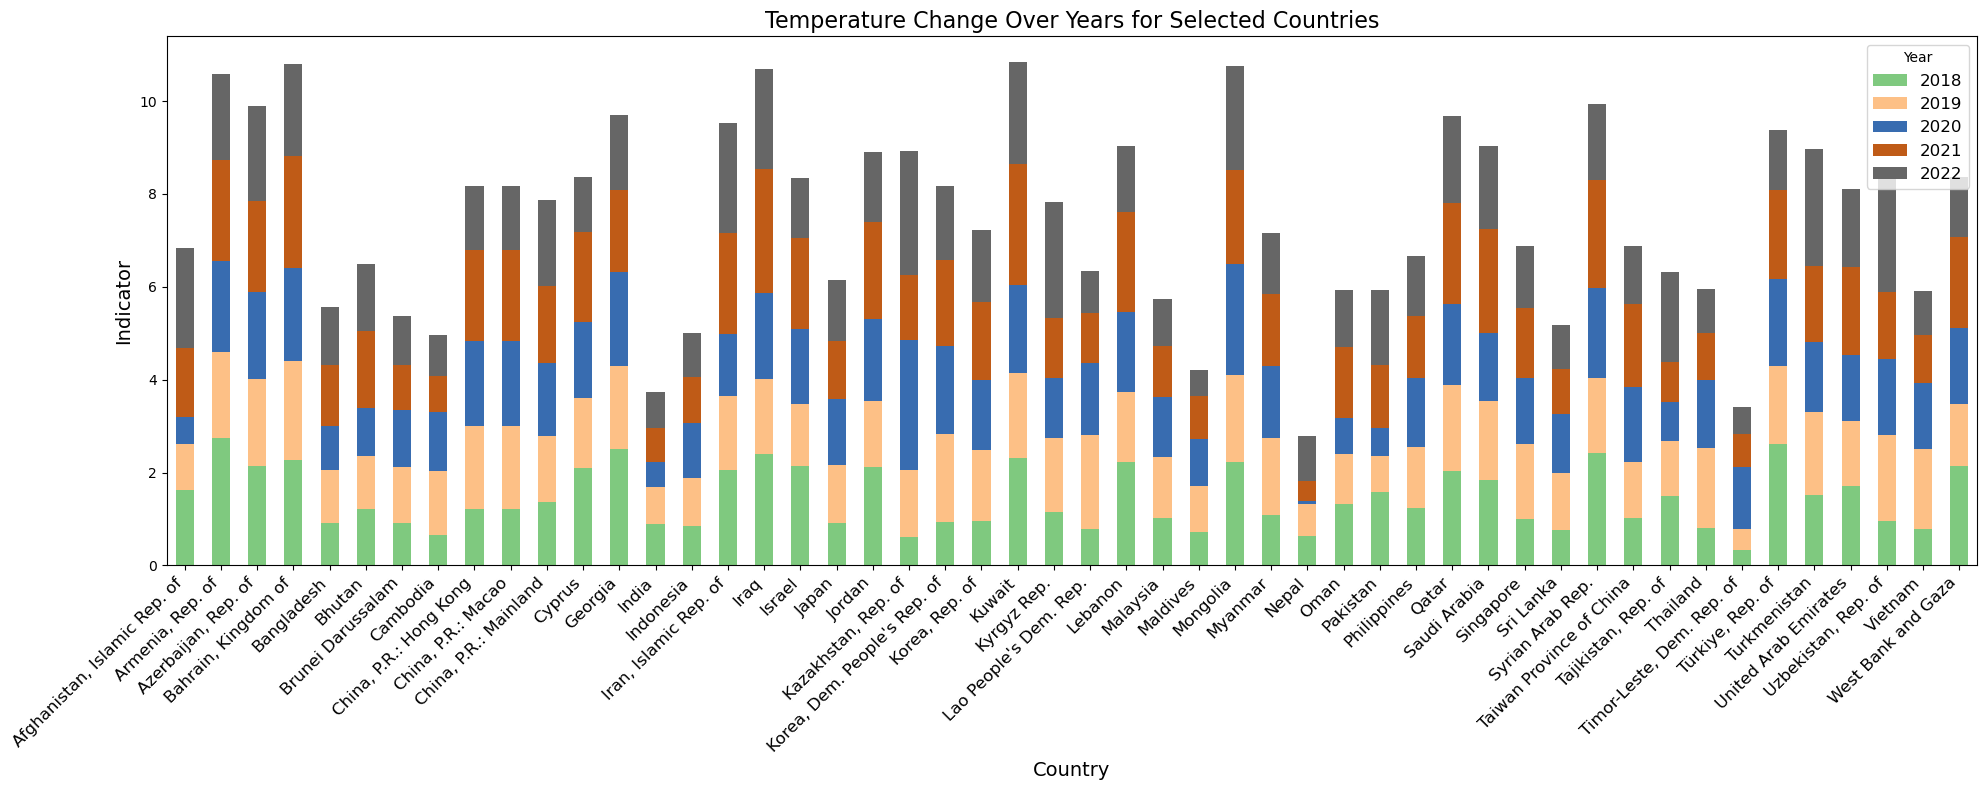

In [14]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_stacked_bar_plot(ast, title)

## DRAFT

In [ ]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất theo các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0
    """

    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate the average value across the specified years
    data['Average'] = data[years].mean(axis=1)

    # Get the top-k and bottom-k countries based on the average value
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Combine top-k and bottom-k for visualization
    combined = pd.concat([top_k, bottom_k])

    # Plot
    plt.figure(figsize=(14, 8))
    for _, row in combined.iterrows():
        plt.plot(years, row[years], label=row['Country'], marker='o')
        for year in years:
            plt.text(
                year, row[year], f"{row[year]:.2f}", fontsize=10, ha='center', va='bottom'
            )

    # Chart customization
    plt.title(f"Top-{k} and Bottom-{k} Countries Over Years", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.tight_layout()
    plt.show()

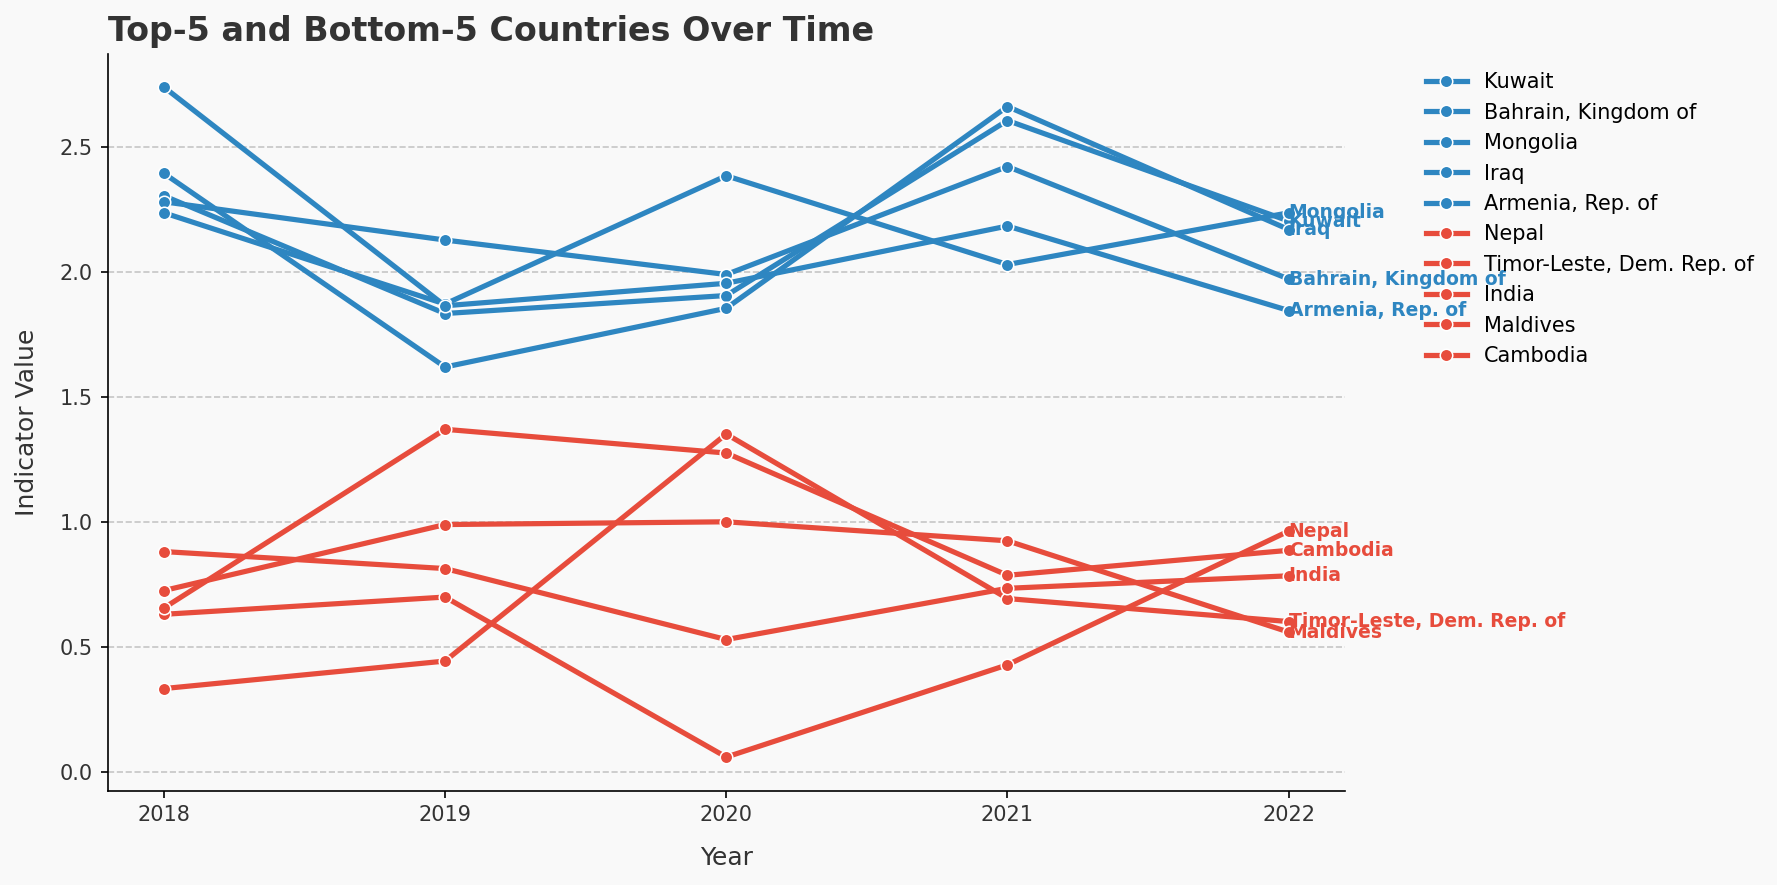

In [69]:
visualize_top_bottom_k_line_plot(ast, 5)